In [5]:
#clustering using spacy embeding
candidate_path = "./data/expanded_candidate.txt"

import spacy
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import en_core_web_lg

nlp=en_core_web_lg.load()

phrases_list=[]
with open(candidate_path,'r',encoding='ascii',errors='ignore') as f:
    phrases_list = f.readlines()
f.close()
for i in range(len(phrases_list)):
    phrases_list[i] = phrases_list[i].rstrip('\n')

from sklearn.decomposition import PCA
phrase_vectors = []
for i in range(len(phrases_list)):
    tmp = nlp(phrases_list[i])
    if (tmp and tmp.vector_norm):
        phrase_vectors.append(tmp.vector)
phrase_vectors = np.array(phrase_vectors)
pca_model = PCA(n_components = 2)
pca_model.fit(phrase_vectors)
phrase_decompose = pca_model.fit_transform(phrase_vectors)

wcss = []
sil = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0,max_iter=300)
    kmeans.fit(phrase_decompose)
    preds = kmeans.predict(phrase_decompose)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(phrase_decompose, preds, metric = 'euclidean'))



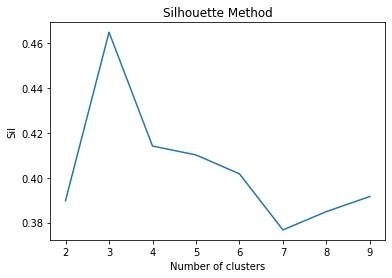

In [6]:
plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

In [9]:
def plot_scatter(embedding_2d, labels, show = True, save_as = None, title = None):
    """
    Visualize 2D data

    Parameters
    --------------------
        embedding_2d   -- numpy array of shape (n,2) samples
        labels         -- numpy array of shape (n,) labels
        show           -- optional boolean indicator on if display the visualziation, default set to True 
        save_as        -- optional string indicating where we should save the figure, default set to None
        title          -- optional string indicating what should be the title, default set to None
    --------------------
        None    
    """
    
    plt.scatter(embedding_2d[:,0], embedding_2d[:,1], c = labels, s = 10) 
    if title is not None:
        plt.title(title)
    if save_as is not None:
        plt.savefig(save_as)
    if show:
        plt.show() 

In [11]:
best_cluster_num = sil[sil.index(min(sil))]
kmeans = KMeans(n_clusters=best_cluster_num, random_state=0,max_iter=300)
kmeans.fit(phrase_decompose)
preds = kmeans.predict(phrase_decompose)

plot_scatter(phrase_decompose, preds)

TypeError: 'numpy.float32' object cannot be interpreted as an integer